In [38]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [44]:
# Функция для извлечения данных из базы в заданном интервале времени и с фильтрацией по motor_name
def get_data_in_time_range(start_time, end_time, motor_name=None):
    
    db_path = 'C:\\Users\\AI-WIN\\PycharmProjects\\Monitor_vibro\\audio_features.db'
    conn = sqlite3.connect(db_path)  # Подключаемся к базе данных

    # Формируем базовый SQL-запрос с фильтрацией по времени
    query = """
    SELECT timestamp, motor_name, file_path, feature_value
    FROM audio_features
    WHERE timestamp BETWEEN ? AND ?
    """
    
    # Если motor_name не None, добавляем фильтрацию по мотору
    if motor_name:
        query += " AND motor_name = ?"
        params = (start_time, end_time, motor_name)
    else:
        params = (start_time, end_time)
    
    # Выполняем запрос
    df = pd.read_sql_query(query, conn, params=params)

    # Закрываем соединение с базой данных
    conn.close()

    return df

In [61]:
start_time = '2024-11-05 11:00:00'
end_time = '2024-11-16 20:46:00'
motor_name = 'm1'

df = get_data_in_time_range(start_time, end_time, motor_name)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values(by='timestamp')
df

,timestamp,motor_name,file_path,feature_value
0,2024-11-09 20:31:00,m1,data\m1_202411092031.wav,0.797632
1,2024-11-09 20:38:00,m1,data\m1_202411092038.wav,0.132481
3,2024-11-09 20:45:00,m1,data\m1_202411092045.wav,0.673857
2,2024-11-09 20:54:00,m1,data\m1_202411092054.wav,0.269013
4,2024-11-13 20:49:00,m1,data\m1_202411132049.wav,0.603517
5,2024-11-14 20:49:00,m1,data\m1\m1_202411142049.wav,0.401352
6,2024-11-14 20:49:00,m1,data\m1_202411142049.wav,0.912508
7,2024-11-15 20:49:00,m1,data\m1\m1_202411152049.wav,0.055473


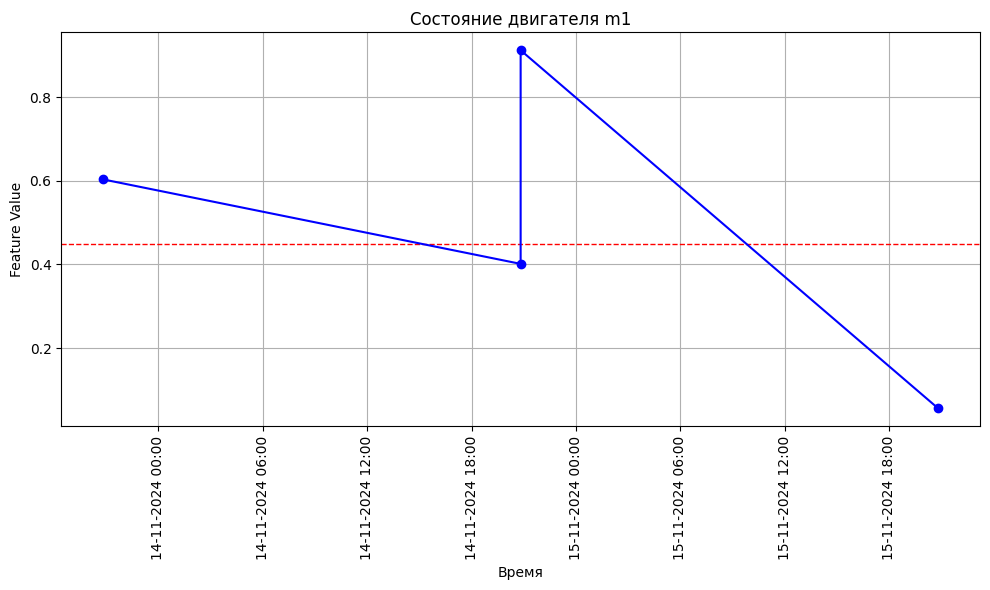

In [60]:
failure_zone = 0.45

plt.figure(figsize=(10, 6))

plt.axhline(y=failure_zone, color='red', linestyle='--', linewidth=1)

plt.plot(df['timestamp'], df['feature_value'], marker='o', linestyle='-', color='b')
plt.title(f'Состояние двигателя {motor_name}')
plt.xlabel('Время')
plt.ylabel('Feature Value')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y %H:%M'))
plt.xticks(rotation=90)
plt.grid(True)

plt.tight_layout()
plt.show()